In [8]:
import numpy as np
from matplotlib import pyplot as plt
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #Convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #Convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    #Compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    #Reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [14]:
import joblib
import cv2
__model = None

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
    img = cv2.imread(image_path)
    plt.imshow(img)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    cropped_faces = []
    for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                cropped_faces.append(roi_color)
    return cropped_faces

In [20]:
def classify_image(file_path = None):

    imgs = get_cropped_image_if_2_eyes(file_path)
    
    for img in imgs:
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))

        len_image_array = 32*32*3 + 32*32

        final = combined_img.reshape(1,len_image_array).astype(float)
        print('Class Identified')
        result_dict = {
            'class': __model.predict(final)[0]
        }

    return result_dict
    

In [21]:
def load_artifacts():
    global __model
    if __model is None:
        with open('saved_model.pkl', 'rb') as f:
            __model = joblib.load(f)

Class Identified
{'class': 1}


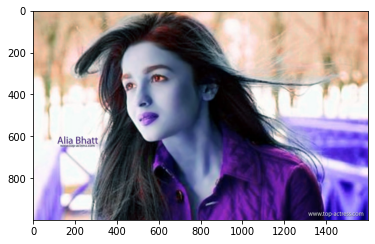

In [22]:
load_artifacts()
print(classify_image("./test_images/1.jpg"))


In [ ]:
load_artifacts()
print(classify_image("./test_images/modi1.jpg"))

In [ ]:
load_artifacts()
print(classify_image("./test_images/jack2.jpg"))

In [ ]:
load_artifacts()
print(classify_image("./test_images/alia5.jpg"))

In [ ]:
load_artifacts()
print(classify_image("./test_images/modi2.jpg"))

Class Identified


NameError: name 'class_number_to_name' is not defined

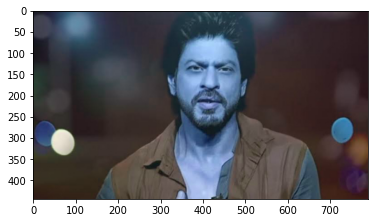

In [19]:
load_artifacts()
print(classify_image("./test_images/30.jpg"))

loading saved artifacts...start
loading saved artifacts...done
Class Identified
[{'class': 'Virat_Kohli'}]


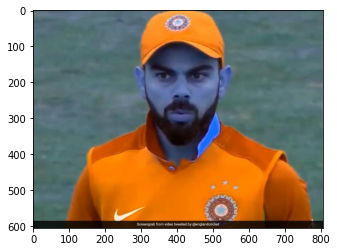

In [91]:
load_saved_artifacts()
print(classify_image("./test_images/vk1.jpg"))

loading saved artifacts...start
loading saved artifacts...done
Class Identified
[{'class': 'Elon_Musk'}]


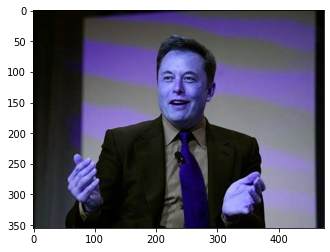

In [92]:
load_saved_artifacts()
print(classify_image("./test_images/musk.jpg"))